In [1]:
# project: p2
# submitter: kkhill4
# partner: none
# hours: 15

In [2]:
#import statements
import loans
%load_ext autoreload
%autoreload 2

import pandas as pd
import json
import time
from io import TextIOWrapper
import matplotlib.pyplot as plt

In [3]:
values = {'activity_year': '2021', 'lei': '549300Q76VHK6FGPX546', 'derived_msa-md': '24580', 'state_code': 'WI','county_code': '55009', 'census_tract': '55009020702', 'conforming_loan_limit': 'C', 'derived_loan_product_type': 'Conventional:First Lien', 'derived_dwelling_category': 'Single Family (1-4 Units):Site-Built', 'derived_ethnicity': 'Not Hispanic or Latino', 'derived_race': 'White', 'derived_sex': 'Joint', 'action_taken': '1', 'purchaser_type': '1', 'preapproval': '2', 'loan_type': '1', 'loan_purpose': '31', 'lien_status': '1', 'reverse_mortgage': '2', 'open-end_line_of_credit': '2', 'business_or_commercial_purpose': '2', 'loan_amount': '325000.0', 'loan_to_value_ratio': '73.409', 'interest_rate': '2.5', 'rate_spread': '0.304', 'hoepa_status': '2', 'total_loan_costs': '3932.75', 'total_points_and_fees': 'NA', 'origination_charges': '3117.5', 'discount_points': '', 'lender_credits': '', 'loan_term': '240', 'prepayment_penalty_term': 'NA', 'intro_rate_period': 'NA', 'negative_amortization': '2', 'interest_only_payment': '2', 'balloon_payment': '2', 'other_nonamortizing_features': '2', 'property_value': '445000', 'construction_method': '1', 'occupancy_type': '1', 'manufactured_home_secured_property_type': '3', 'manufactured_home_land_property_interest': '5', 'total_units': '1', 'multifamily_affordable_units': 'NA', 'income': '264', 'debt_to_income_ratio': '20%-<30%', 'applicant_credit_score_type': '2', 'co-applicant_credit_score_type': '9', 'applicant_ethnicity-1': '2', 'applicant_ethnicity-2': '', 'applicant_ethnicity-3': '', 'applicant_ethnicity-4': '', 'applicant_ethnicity-5': '', 'co-applicant_ethnicity-1': '2', 'co-applicant_ethnicity-2': '', 'co-applicant_ethnicity-3': '', 'co-applicant_ethnicity-4': '', 'co-applicant_ethnicity-5': '', 'applicant_ethnicity_observed': '2', 'co-applicant_ethnicity_observed': '2', 'applicant_race-1': '5', 'applicant_race-2': '', 'applicant_race-3': '', 'applicant_race-4': '', 'applicant_race-5': '', 'co-applicant_race-1': '5', 'co-applicant_race-2': '', 'co-applicant_race-3': '', 'co-applicant_race-4': '', 'co-applicant_race-5': '', 'applicant_race_observed': '2', 'co-applicant_race_observed': '2', 'applicant_sex': '1', 'co-applicant_sex': '2', 'applicant_sex_observed': '2', 'co-applicant_sex_observed': '2', 'applicant_age': '35-44', 'co-applicant_age': '35-44', 'applicant_age_above_62': 'No', 'co-applicant_age_above_62': 'No', 'submission_of_application': '1', 'initially_payable_to_institution': '1', 'aus-1': '1', 'aus-2': '', 'aus-3': '', 'aus-4': '', 'aus-5': '', 'denial_reason-1': '10', 'denial_reason-2': '', 'denial_reason-3': '', 'denial_reason-4': '', 'tract_population': '6839', 'tract_minority_population_percent': '8.85999999999999943', 'ffiec_msa_md_median_family_income': '80100', 'tract_to_msa_income_percentage': '150', 'tract_owner_occupied_units': '1701', 'tract_one_to_four_family_homes': '2056', 'tract_median_age_of_housing_units': '15'}

In [4]:
applicant = loans.Applicant("20-30", ["1", "2", "3"])
print(applicant.race)

{'Black or African American', 'American Indian or Alaska Native', 'Asian'}


In [5]:
repr(applicant)

"Applicant('20-30', ['American Indian or Alaska Native', 'Asian', 'Black or African American'])"

In [6]:
print(applicant.lower_age())

20


In [7]:
applicants = [
    loans.Applicant(">75", ["43", "44"]),
    loans.Applicant("20-30", ["1", "3"]),
    loans.Applicant("35-44", ["22"]),
    loans.Applicant("<25", ["5"]),
]
sorted_applicants = sorted(applicants)
for applicant in sorted_applicants:
    print(applicant)

Applicant('20-30', ['American Indian or Alaska Native', 'Black or African American'])
Applicant('<25', ['White'])
Applicant('35-44', ['Chinese'])
Applicant('>75', ['Other Pacific Islander', 'Samoan'])


In [8]:
loan = loans.Loan(values)
print(loan.interest_rate)

2.5


In [9]:
print(loan)

<Loan: 2.5% on $445000.0 with 2 applicant(s)>


In [10]:
for amt in loan.yearly_amounts(30000):
    print(amt)

325000.0
303125.0
280703.125
257720.703125
234163.720703125
210017.81372070312
185268.2590637207
159899.96554031371
133897.46467882156
107244.90129579211
79926.02382818691
51924.174423891585
23222.278784488873


In [11]:
uwcu = loans.Bank("University of Wisconsin Credit Union")
uwcu.lei

'254900CN1DD55MJDFH69'

In [12]:
uwcu[-1]

<Loan: -1% on $255000.0 with 1 applicant(s)>

In [13]:
len(uwcu)

19739

In [14]:
import search
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
tree = search.BST()
tree.add("A", 9)
tree.add("A", 5)
tree.add("B", 22)
tree.add("C", 33)
tree.dump()

A : [9, 5]
B : [22]
C : [33]


In [16]:
t = search.BST()
t.add("B", 3)
assert len(t.root) == 1
t.add("A", 2)
assert len(t.root) == 2
t.add("C", 1)
assert len(t.root) == 3
t.add("C", 4)
assert len(t.root) == 4
t

In [17]:
t.root.lookup("A")

[2]

In [18]:
t.root.lookup("C")

[1, 4]

In [19]:
t.root.lookup("Z")

[]

In [20]:
first_home_bank = loans.Bank("First Home Bank")

In [21]:
#Q1 What is the average interest rate for the bank?
i_rates = [float(str(loan).split(" ")[1].split("%")[0]) for loan in first_home_bank.loans if loan.interest_rate != -1]
avg_i_rate = sum(i_rates) / len(i_rates) if i_rates else 0.0
avg_i_rate

2.8333333333333335

In [22]:
#Q2: how many applicants are there per loan, on average?
app_counts = [int(str(loan).split(" ")[5]) for loan in first_home_bank.loans]
avg_applicants_per_loan = sum(app_counts) / len(app_counts) if app_counts else 0.0
avg_applicants_per_loan

1.3043478260869565

In [23]:
#Q3: what is the distribution of ages?
distribution_ages = {}
for loan in first_home_bank.loans:
    for applicant in loan.applicants:
        if applicant.age in distribution_ages:
            distribution_ages[applicant.age] += 1
        else:
            distribution_ages[applicant.age] = 1                  
distribution_ages    

{'55-64': 12, '45-54': 8, '65-74': 3, '25-34': 3, '35-44': 1, '>74': 3}

In [24]:
#Q4: how many interest rate values are missing?
t = search.BST()
for val in first_home_bank.loans:
    t.add(val.interest_rate, val) 
len(t[-1])

11

In [25]:
#Q5: how tall is the tree?
def max_depth(node):
    if node is None:
        return -1
    left_height = max_depth(node.left)
    right_height = max_depth(node.right)
    return 1 + max(left_height, right_height)
tree_height = max_depth(t.root)
tree_height

5

Text(0, 0.5, 'Total Elapsed Milliseconds')

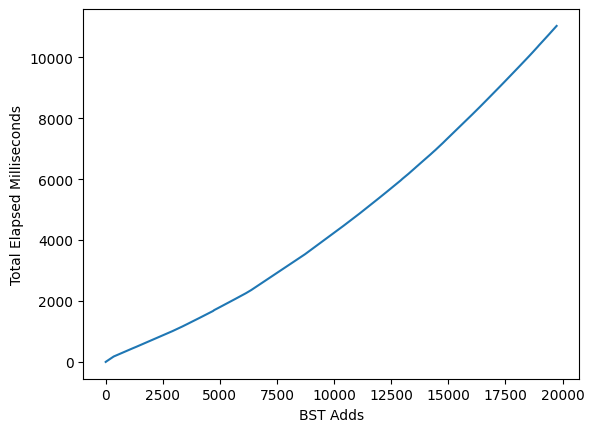

In [26]:
#Q6: how long does it take to add the loans to the tree?
Q6_df = pd.DataFrame(dtype = float)

t = search.BST()
t_zero = time.time()
count = 0
for val in uwcu.loans:
    t.add(val.interest_rate, val)
    count += 1 
    t_one = time.time()
    run_time = (t_one-t_zero)*1000
    Q6_df.at[count, "Time"] = run_time   

graph_df = Q6_df.plot.line(legend = False)
graph_df.set_xlabel("BST Adds")
graph_df.set_ylabel("Total Elapsed Milliseconds") 

Text(0, 0.5, 'Milliseconds')

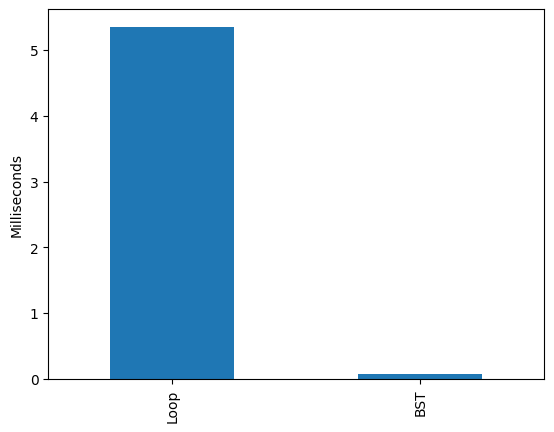

In [27]:
#Q7: how fast are tree lookups?
Q7_df = pd.DataFrame(dtype = float)

t_zero = time.time()
count = 0
for val in uwcu.loans:
    if val.interest_rate == -1:
        count += 1       

t_one = time.time()
diff_1 = (t_one - t_zero)*1000
Q7_df.at["Loop", time] = diff_1
t_zero = time.time()
bst = len(t[-1])
t_one = time.time()
diff_2 = (t_one-t_zero)*1000
Q7_df.at["BST", time] = diff_2

df = Q7_df.plot.bar(legend = False)
df.set_ylabel("Milliseconds")

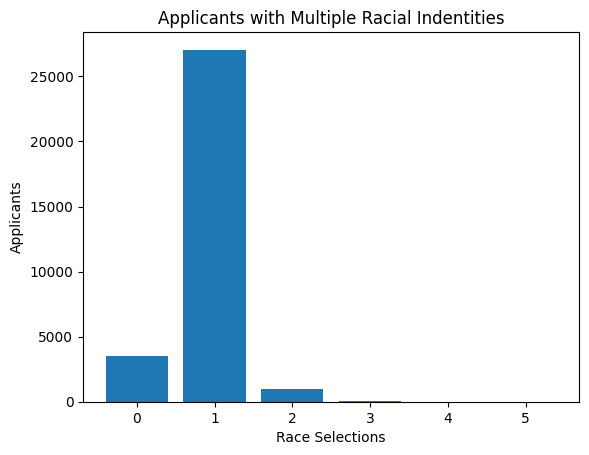

In [28]:
#Q8: How many applicants indicate multiple racial identities?
count = {}
for loan in uwcu.loans:
    for app in loan.applicants:
        race_selections = len(app.race) 
        if race_selections in count:
            count[race_selections] += 1
        else:
            count[race_selections] = 1

df = pd.DataFrame({"Race Selections": list(count.keys()),
                             "Applicants": list(count.values())})
df = df.sort_values(by = "Race Selections")

plt.bar(df["Race Selections"], df["Applicants"])
plt.xlabel("Race Selections")
plt.ylabel("Applicants")
plt.title("Applicants with Multiple Racial Indentities")
plt.show()

In [29]:
#Q9: How many leaf nodes are in the tree?
13

13